In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

In [2]:
name='df_val_q_intra_TSNE_2,{10,20,30,40,50,70,100,200,500},200,12,2000_Tier1'
#dataTSNE=pd.read_csv('/home/christopher/BGI/people/ckrich/Projects/EcosystemCharacterisationByCausalNetworks/Data/%s.csv'%name,index_col=0)
dataTSNE=pd.read_csv('../Data/%s.csv'%name,index_col=0)

In [2]:
step=91
extent="intra" #"intra") #inter or intra # irrelevant for MovingWindow
Dataset='Jake'
var_names = ["Rg","T","NEE","VPD","H","LE"]
nv=len(var_names)
tau_min=0
tau_max=5
min_len=5
attribute2='_RgNotDriver'


In [3]:
alpha_level=0.1

In [4]:
data=pd.read_csv("../Data/df_val_q_t_y_m_%s_%s_%s_%s_%s_%s%s_Tier1.csv" % (Dataset,extent,step,tau_max,min_len,alpha_level,attribute2),index_col=0)

In [5]:
cont_links_agg=[]
lag_links_agg=[]
matrix=np.zeros((nv,nv,tau_max-tau_min+1),'U8')
for i,d in enumerate(var_names):
    for j,r in enumerate(var_names):
        #for t in [0,1,2,3,4,5]:
        #labels.append(d + "→" +r+':1-6')
        cont_links_agg.append(d + "→" +r+':0')
        lag_links_agg.append(d + "→" +r+':1-%s'%(tau_max))
           # matrix[i,j,t]=d + "→" +r+str(t)

lag_links_agg_red=[]
for i,link in enumerate(lag_links_agg):
 #   if not link[:link.index('→')] in link[link.index('→'):]:
        if not 'Rg' in link[link.index('→'):]:
            lag_links_agg_red.append(link)

lag_links_agg_red_noAC=[]
for i,link in enumerate(lag_links_agg):
    if not link[:link.index('→')] in link[link.index('→'):]:
        if not 'Rg' in link[link.index('→'):]:
            lag_links_agg_red.append(link)

cont_links_agg_red=[]
for i,link in enumerate(cont_links_agg):
    if not link[:link.index('→')] in link[link.index('→'):]:
        if not 'Rg' in link[link.index('→'):]:
            if  link[link.index('→')+1:link.index(':')] + '→' + link[:link.index('→')] +':0' not in cont_links_agg_red:
                cont_links_agg_red.append(link)
                
cont_links_agg_red_NEE=[]
cont_links_agg_red_NEE=[link for link in cont_links_agg_red if 'NEE' in link]

cont_links_agg_red_noNEE=[]
cont_links_agg_red_noNEE=[link for link in cont_links_agg_red if 'NEE' not in link]

cont_links_agg_red_NEELE=[]
cont_links_agg_red_NEELE=[link for link in cont_links_agg_red if 'NEE' in link or 'LE' in link ]

cont_links_agg_red_noNEELE=[]
cont_links_agg_red_noNEELE=[link for link in cont_links_agg_red if 'NEE' not in link and 'LE' not in link]

In [6]:
#run rsne for several parameter values
networkexcerpt=cont_links_agg_red

In [7]:
data.columns.values[49:265]=data.columns.values[49:265].astype(int)


In [10]:
index=data.loc[:,networkexcerpt].dropna().index
for i in [30]: #[20,50,100,200,500]: # [2,10,20,40,60,100]: # [30,40,60,70,80,90,110]: #
    print(i)
    restsne=TSNE(perplexity=i,random_state=653,learning_rate=200,early_exaggeration=12,n_iter=2000,).fit_transform(data.loc[index,networkexcerpt])

30


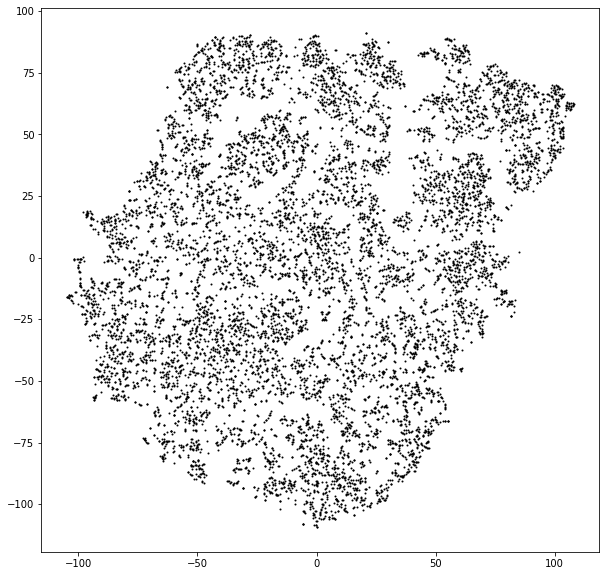

In [11]:
fig=plt.figure(figsize=(10,10))
ax=plt.scatter(restsne[:,0],restsne[:,1],s=1,c='black',cmap='nipy_spectral')

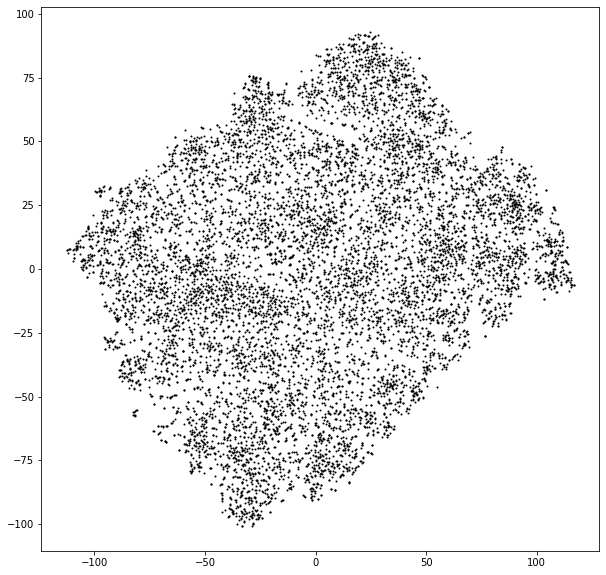

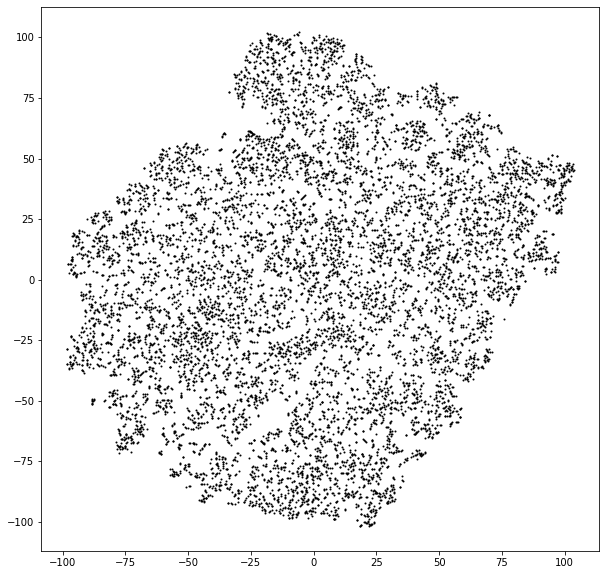

In [8]:

data.to_csv("../Data/%s.csv" % name)

In [19]:
#run rsne for several parameter values
index=data[networkexcerpt].dropna().index #[0:1000]


print('perplexity')

for i in [30]: # [2,10,20,40,60,100]: # [30,40,60,70,80,90,110]: #
    for dim in [2]: #,4,5,6,7,8,9,10,15,20]:	
        for rand_state in [ 6455, 4977, 3212, 7929, 8325, 7028, 9320, 2912, 3817, 4227, 7460, 1039, 7906,  779, 6541, 8008]: #3260, 653, 1521,  498,
            print(rand_state)
           # data=pd.read_csv("../Data/%s.csv" % name,index_col=0)
           # data.columns.values[49:265]=data.columns.values[49:265].astype(int)
            index=data[networkexcerpt].dropna().index
            setting=TSNE(n_components=dim,perplexity=i,learning_rate=200,early_exaggeration=12,random_state=rand_state,n_iter=2000)
            restsne=setting.fit_transform(data[networkexcerpt].loc[index,:])
            data.loc[index,'TSNE1_%s'% rand_state]=restsne[:,0]
            data.loc[index,'TSNE2_%s'% rand_state]=restsne[:,1]

            #data.to_csv("../Data/%s.csv" % name)
            print(i,setting.kl_divergence_)

perplexity
6455
30 1.9110734462738037
4977
30 1.9073268175125122
3212
30 1.9093573093414307
7929
30 1.9115594625473022
8325
30 1.9101228713989258
7028
30 1.905508279800415
9320
30 1.9079171419143677
2912
30 1.9095817804336548
3817
30 1.9118168354034424
4227
30 1.9110995531082153
7460
30 1.9096760749816895
1039
30 1.9078786373138428
7906
30 1.9120101928710938
779
30 1.9080097675323486
6541
30 1.9062879085540771
8008
30 1.9109712839126587


In [16]:
            data.loc[index,'TSNE1_%s'% i]=restsne[:,0]
            data.loc[index,'TSNE2_%s'% i]=restsne[:,1]

In [10]:
data

,Rg_mean_y,T_mean_y,NEE_mean_y,VPD_mean_y,H_mean_y,LE_mean_y,P_mean_y,GPP_mean_y,Tower,lon,...,TSNE1_653,TSNE2_653,TSNE1_1521,TSNE2_1521,TSNE1_498,TSNE2_498,TSNE1_6455,TSNE2_6455,TSNE1_4977,TSNE2_4977
0,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,68.775963,-55.743679,5.253655,89.923256,-88.958481,2.599976,88.675392,15.888926,-67.599503,56.558704
1,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,25.746113,59.297291,62.716969,-19.029034,15.065187,-65.319748,-2.801860,-67.198090,52.223557,33.160187
2,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,32.760124,49.467220,60.655579,-7.639125,4.030752,-61.756233,6.396867,-61.087475,41.009964,37.496502
3,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,31.426302,48.628014,58.988377,-7.778526,4.393402,-60.162296,5.770273,-59.622604,40.352383,36.003296
4,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,27.632040,36.928986,47.593948,-2.625100,-0.728260,-48.144882,8.622489,-46.068466,29.460340,30.875313
5,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,27.274206,36.579220,47.095917,-2.679251,-0.589735,-47.655872,8.387876,-45.628334,29.197262,30.448132
6,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,27.771475,37.539932,48.154900,-2.893835,-0.567324,-48.743195,8.594927,-46.662319,30.002081,31.162943
7,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,43.634411,39.385288,60.061104,8.216798,-10.959706,-61.381538,20.839661,-56.780903,29.160423,46.300785
8,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,49.810337,31.937351,59.179848,17.564219,-20.861359,-56.745419,30.307634,-51.505482,21.757959,51.536556
9,136.391920,6.803304,1.028648,3.243340,0.921629,35.689587,1.828585,6.191534,AT-Neu.DD.2002.2012.nc,11.3175,...,83.488029,-46.746426,21.936428,95.018448,-95.940727,-13.148530,97.293549,2.213045,-61.188740,72.060883


3260


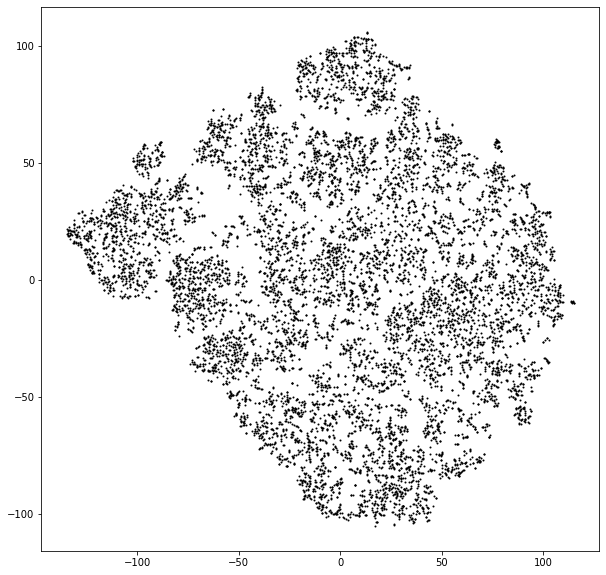

653


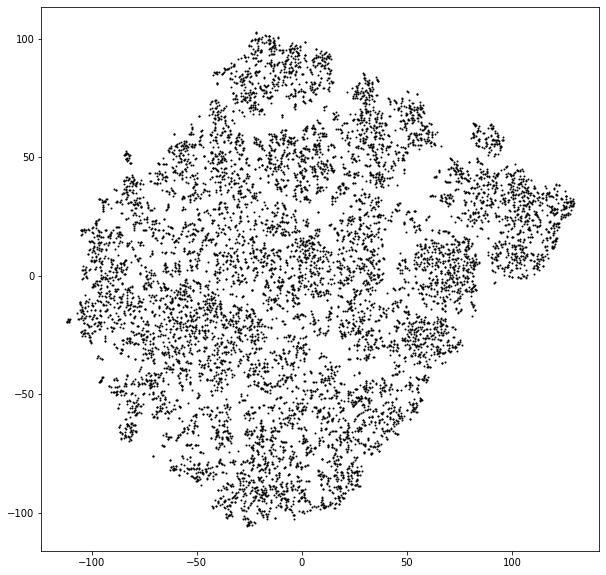

1521


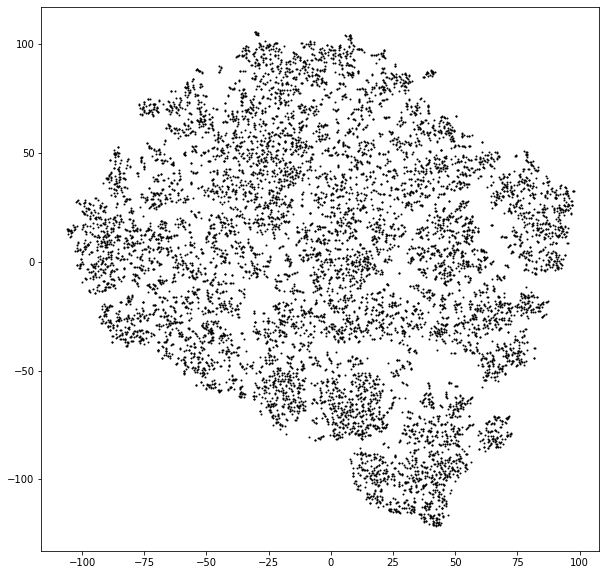

498


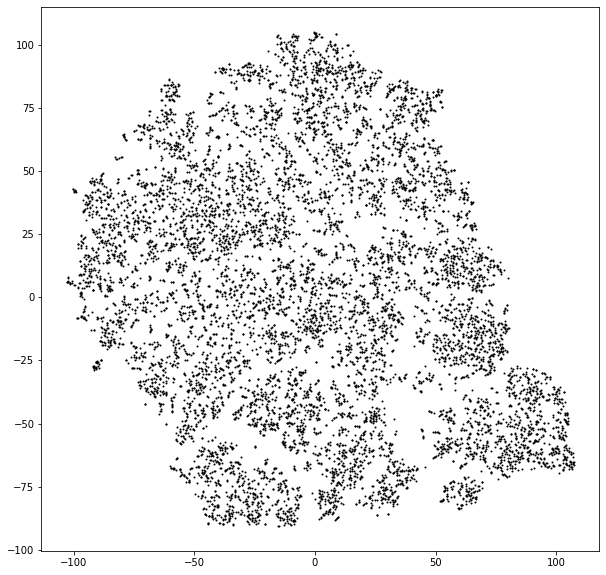

6455


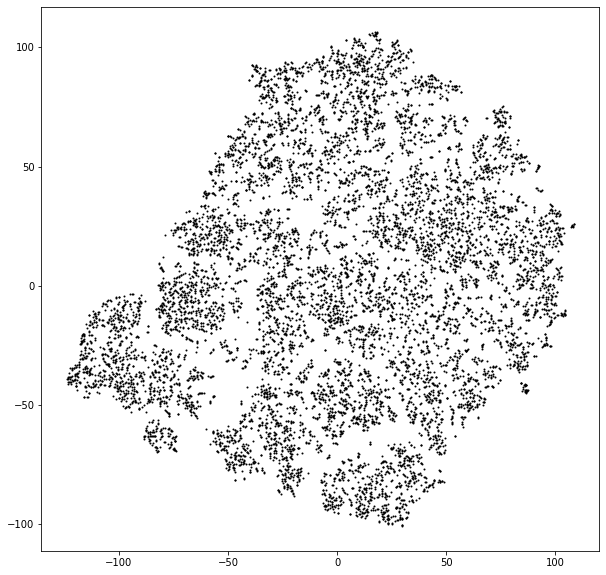

4977


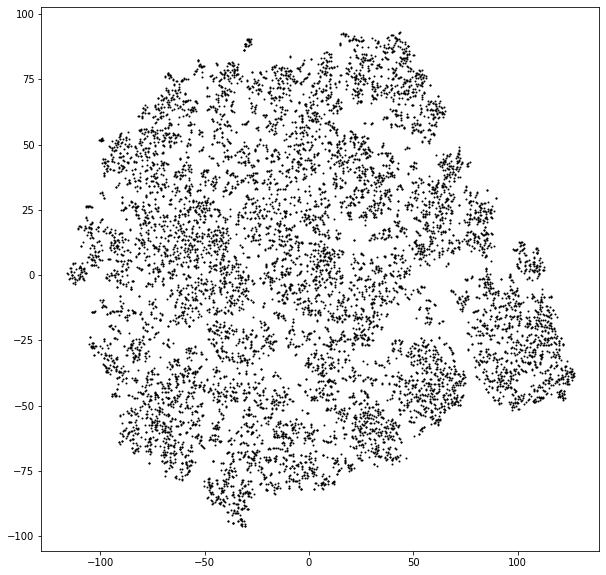

3212


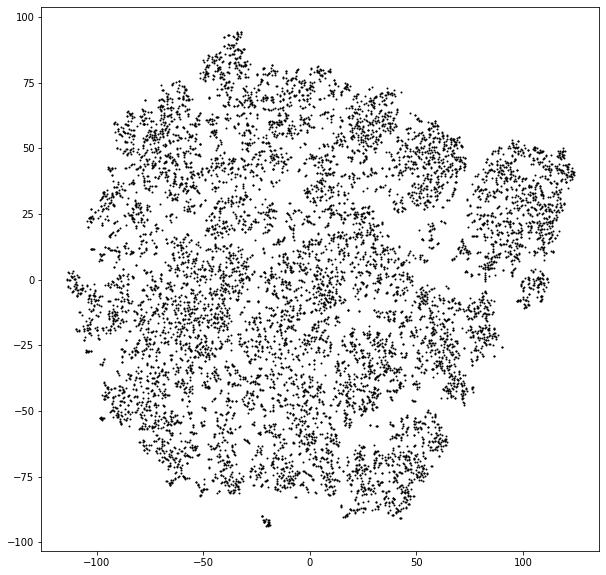

7929


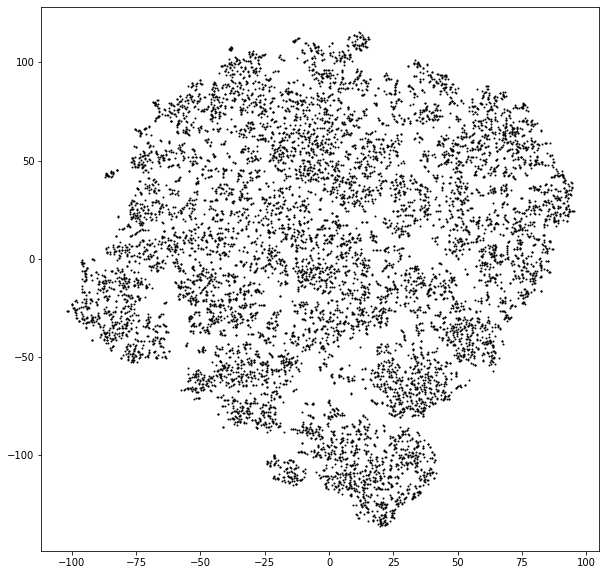

8325


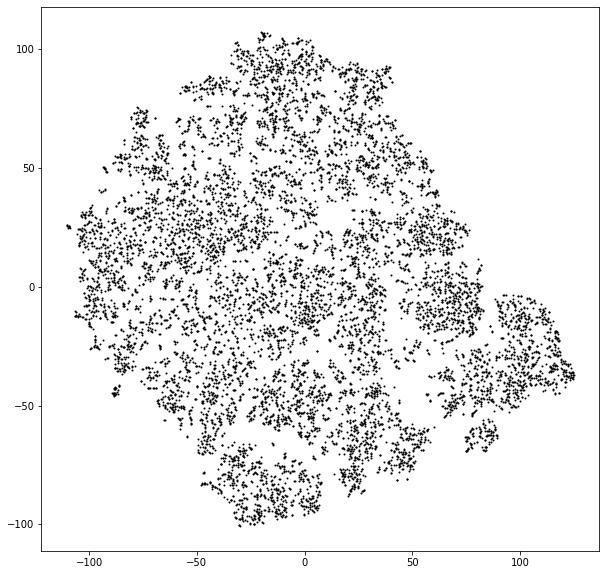

7028


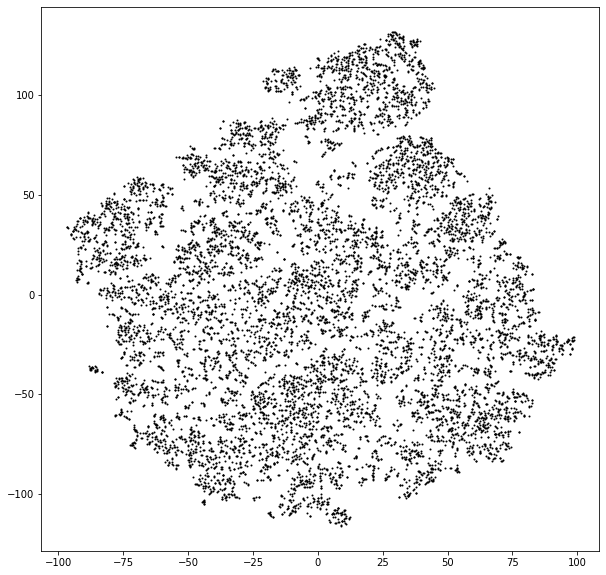

9320


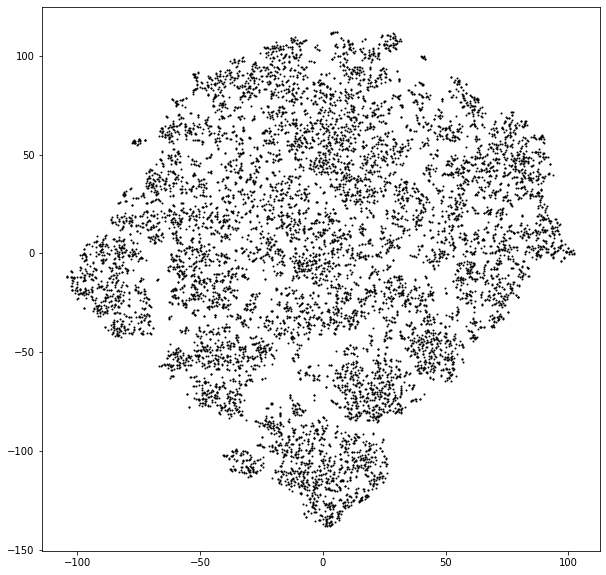

2912


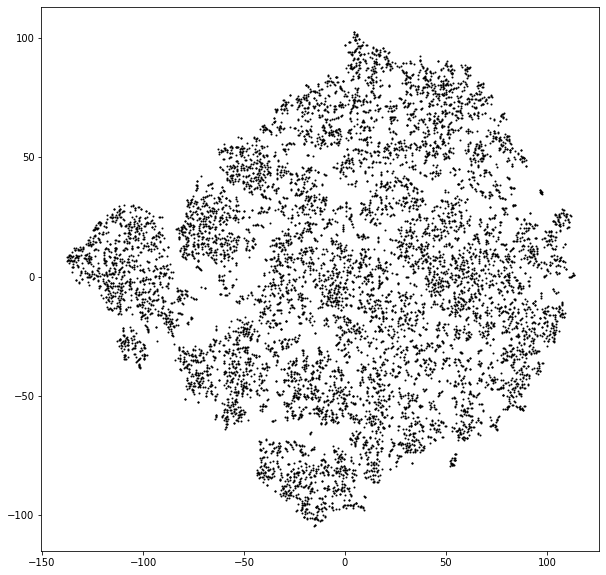

3817


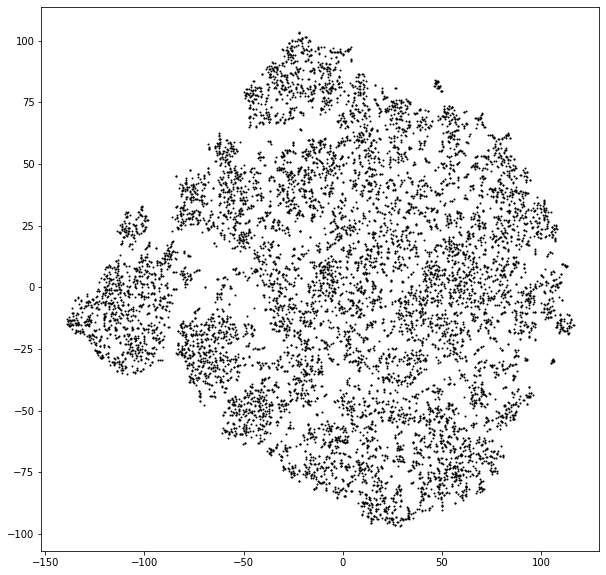

4227


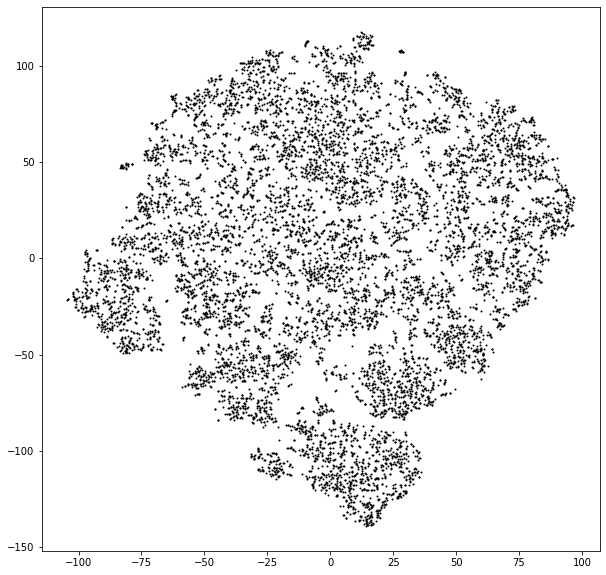

7460


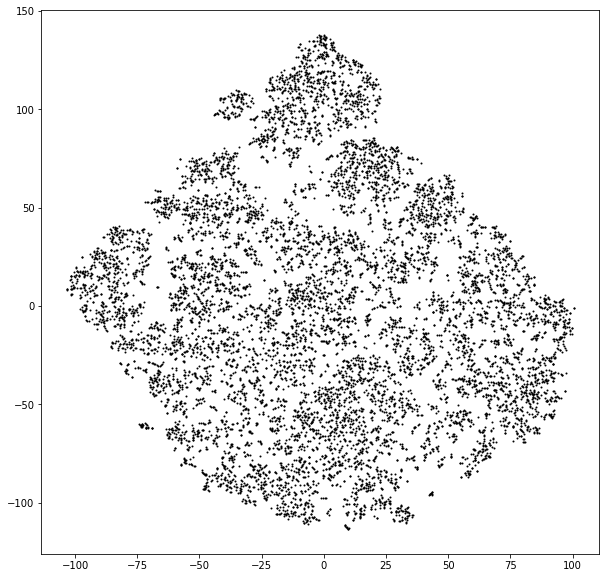

1039


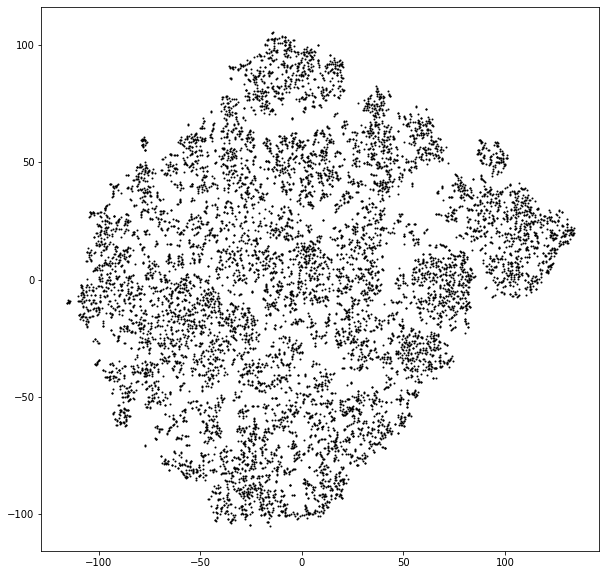

7906


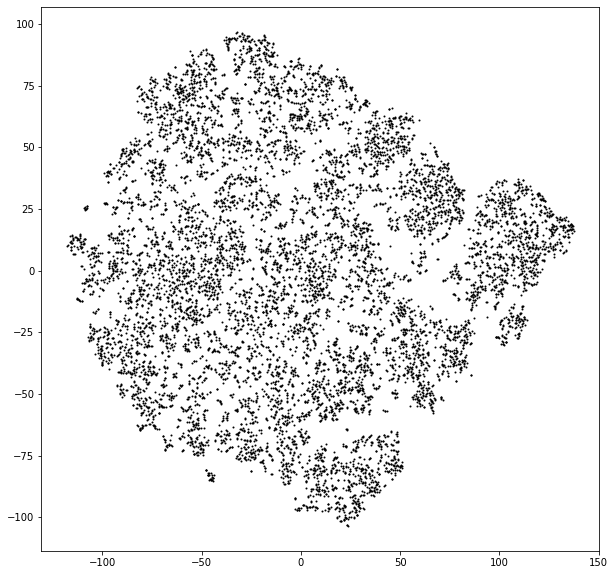

779


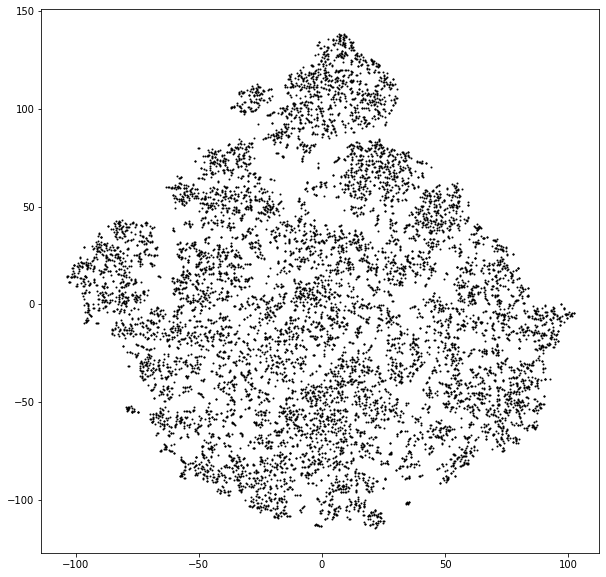

6541


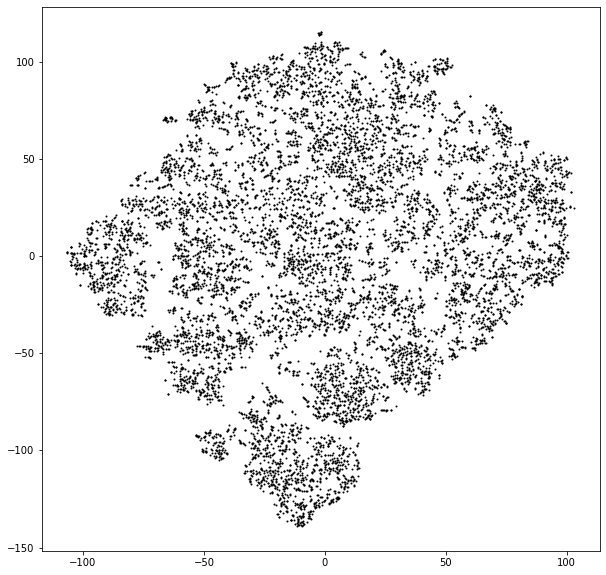

8008


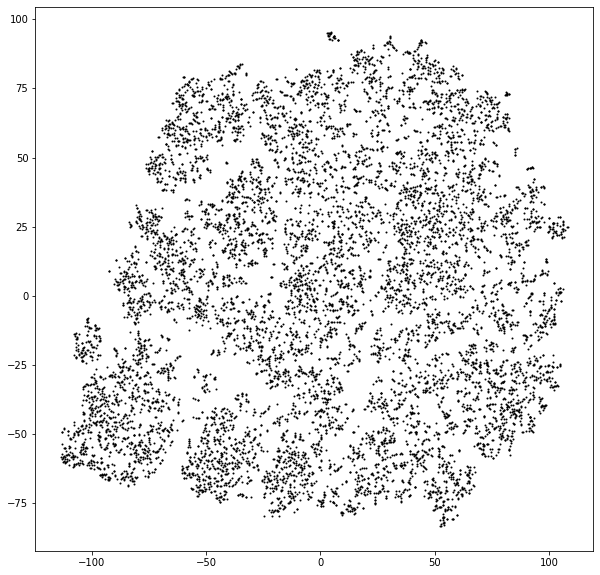

In [20]:
i=50
for rand_state in [3260,  653, 1521,  498, 6455, 4977, 3212, 7929, 8325, 7028, 9320, 2912, 3817, 4227, 7460, 1039, 7906,  779, 6541, 8008]: # [10,20,30,40,50,70,100,200,500]: #
    print(rand_state)
    fig=plt.figure(figsize=(10,10))
    ax=plt.scatter(data.loc[:,'TSNE1_%s'%rand_state],data.loc[:,'TSNE2_%s'%rand_state],s=1,c='black',cmap='nipy_spectral')
    plt.show()

In [30]:
dataTSNE.columns.values

array(['Rg_mean_y', 'T_mean_y', 'NEE_mean_y', 'VPD_mean_y', 'H_mean_y',
       'LE_mean_y', 'P_mean_y', 'GPP_mean_y', 'Tower', 'lon', 'lat',
       'Rg_mean_s', 'T_mean_s', 'NEE_mean_s', 'VPD_mean_s', 'H_mean_s',
       'LE_mean_s', 'P_mean_s', 'GPP_mean_s', 'Rg_mean', 'Rg_max',
       'Rg_min', 'T_mean', 'T_max', 'T_min', 'NEE_mean', 'NEE_max',
       'NEE_min', 'VPD_mean', 'VPD_max', 'VPD_min', 'H_mean', 'H_max',
       'H_min', 'LE_mean', 'LE_max', 'LE_min', 'P_mean', 'P_max', 'P_min',
       'GPP_mean', 'GPP_max', 'GPP_min', 'SWC1_mean', 'SWC1q_mean',
       'SWC2_mean', 'SWC2q_mean', 'Year', 'Season', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
 

In [9]:
j=30
i=30
data['TSNE_cont_links_agg_red_%s1'%j]=TSNE['TSNE1_%s'%i]
data['TSNE_cont_links_agg_red_%s2'%j]=TSNE['TSNE2_%s'%i]

TypeError: 'type' object is not subscriptable

In [12]:
j=30
data['TSNE_cont_links_agg_red_%s1'%j]=restsne[:,0]
data['TSNE_cont_links_agg_red_%s2'%j]=restsne[:,1]

In [13]:
data.to_csv("../Data/df_val_q_t_y_m_%s_%s_%s_%s_%s_%s%s_Tier1.csv" % (Dataset,extent,step,tau_max,min_len,alpha_level,attribute2))

In [200]:
j=5
data.drop(['TSNE_cont_links_agg_red_%s1'%j,'TSNE_cont_links_agg_red_%s2'%j],axis=1, inplace=True)

# tsne on random data

In [18]:
data_rand=np.random.rand(data[networkexcerpt].shape[0],data[networkexcerpt].shape[1])

In [19]:
for i in [30]: #[20,50,100,200,500]: # [2,10,20,40,60,100]: # [30,40,60,70,80,90,110]: #
    print(i)
    restsne=TSNE(perplexity=i,random_state=653,learning_rate=200,early_exaggeration=12,n_iter=2000,).fit_transform(data_rand)

30


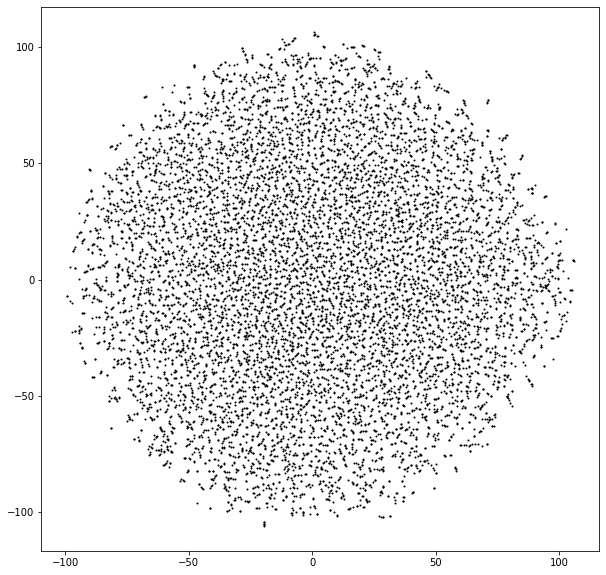

In [20]:
fig=plt.figure(figsize=(10,10))
ax=plt.scatter(restsne[:,0],restsne[:,1],s=1,c='black',cmap='nipy_spectral')